In [1]:
import os
os.chdir("/Users/Clair/machine_learning_sp20")

In [2]:
import numpy as np
import pandas as pd
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


In [3]:
#################################################################
# DATASET #2
# Forest Fires
# -Regression
# -Label Encoding
#################################################################

In [9]:
# READ IN DATA
fire_columns = ["x_coord", "y_coord", "month", "day", "ffmc", "dmc", "dc", 
                  "isi", "temp", "rel_humid", "wind", "rain",
                 "area"]
fire_data = pd.read_csv("forestfires.csv", names=fire_columns, header=None)
fire_data = fire_data[fire_data['area'] !=0]

In [10]:
# ENCODE STRING DATA
fire_data["month_num"] = fire_data.month.map({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
                                              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})

fire_data["week_day_num"] = fire_data.day.map({"sun": 1, "mon": 2, "tue": 3, "wed": 4, "thu": 5, "fri": 6, "sat":7})

fire_data = fire_data.drop(columns=["month", "day"])


In [11]:
fire_targets = fire_data["area"]
fire_data = fire_data.drop(columns=["area"])


In [12]:
train_data, test_data, train_targets, test_targets = train_test_split(fire_data, fire_targets, 
                                                                      test_size = 0.3, shuffle = True)


In [13]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=12, units=6, kernel_initializer="uniform"))
#Hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=3, kernel_initializer="uniform"))


#output layer with 1 output neuron which will predict 1 or 0
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [14]:
# Compile model
classifier.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.RMSprop(), metrics=['mean_absolute_error'])

# Fit the model
ep = 400
classifier.fit(train_data, train_targets,
                    epochs=ep,
                    validation_data=(test_data, test_targets))

Train on 189 samples, validate on 81 samples
Epoch 1/400
189/189 [==============================] - 0s 624us/step - loss: 3915.2260 - mean_absolute_error: 17.9454 - val_loss: 17651.5971 - val_mean_absolute_error: 38.5426
Epoch 2/400
189/189 [==============================] - 0s 63us/step - loss: 3915.0213 - mean_absolute_error: 17.9399 - val_loss: 17651.2758 - val_mean_absolute_error: 38.5387
Epoch 3/400
189/189 [==============================] - 0s 63us/step - loss: 3914.8825 - mean_absolute_error: 17.9360 - val_loss: 17651.0056 - val_mean_absolute_error: 38.5355
Epoch 4/400
189/189 [==============================] - 0s 74us/step - loss: 3914.7621 - mean_absolute_error: 17.9326 - val_loss: 17650.7535 - val_mean_absolute_error: 38.5325
Epoch 5/400
189/189 [==============================] - 0s 69us/step - loss: 3914.6472 - mean_absolute_error: 17.9297 - val_loss: 17650.5047 - val_mean_absolute_error: 38.5295
Epoch 6/400
189/189 [==============================] - 0s 84us/step - loss: 391

189/189 [==============================] - 0s 84us/step - loss: 3908.4015 - mean_absolute_error: 17.7728 - val_loss: 17636.9621 - val_mean_absolute_error: 38.3714
Epoch 48/400
189/189 [==============================] - 0s 79us/step - loss: 3908.2245 - mean_absolute_error: 17.7686 - val_loss: 17636.5872 - val_mean_absolute_error: 38.3671
Epoch 49/400
189/189 [==============================] - 0s 69us/step - loss: 3908.0554 - mean_absolute_error: 17.7640 - val_loss: 17636.2313 - val_mean_absolute_error: 38.3630
Epoch 50/400
189/189 [==============================] - 0s 84us/step - loss: 3907.8943 - mean_absolute_error: 17.7599 - val_loss: 17635.8857 - val_mean_absolute_error: 38.3591
Epoch 51/400
189/189 [==============================] - 0s 63us/step - loss: 3907.7324 - mean_absolute_error: 17.7560 - val_loss: 17635.5301 - val_mean_absolute_error: 38.3550
Epoch 52/400
189/189 [==============================] - 0s 74us/step - loss: 3907.5647 - mean_absolute_error: 17.7522 - val_loss: 176

189/189 [==============================] - 0s 84us/step - loss: 3902.2805 - mean_absolute_error: 17.6274 - val_loss: 17623.8079 - val_mean_absolute_error: 38.2207
Epoch 94/400
189/189 [==============================] - 0s 100us/step - loss: 3902.1879 - mean_absolute_error: 17.6254 - val_loss: 17623.6021 - val_mean_absolute_error: 38.2183
Epoch 95/400
189/189 [==============================] - 0s 84us/step - loss: 3902.0903 - mean_absolute_error: 17.6234 - val_loss: 17623.3865 - val_mean_absolute_error: 38.2158
Epoch 96/400
189/189 [==============================] - 0s 90us/step - loss: 3901.9960 - mean_absolute_error: 17.6211 - val_loss: 17623.1910 - val_mean_absolute_error: 38.2136
Epoch 97/400
189/189 [==============================] - 0s 74us/step - loss: 3901.9064 - mean_absolute_error: 17.6190 - val_loss: 17622.9967 - val_mean_absolute_error: 38.2114
Epoch 98/400
189/189 [==============================] - 0s 84us/step - loss: 3901.8186 - mean_absolute_error: 17.6169 - val_loss: 17

Epoch 139/400
189/189 [==============================] - 0s 84us/step - loss: 3899.2576 - mean_absolute_error: 17.5583 - val_loss: 17617.2976 - val_mean_absolute_error: 38.1468
Epoch 140/400
189/189 [==============================] - 0s 79us/step - loss: 3899.2155 - mean_absolute_error: 17.5574 - val_loss: 17617.2056 - val_mean_absolute_error: 38.1458
Epoch 141/400
189/189 [==============================] - 0s 74us/step - loss: 3899.1758 - mean_absolute_error: 17.5563 - val_loss: 17617.1244 - val_mean_absolute_error: 38.1449
Epoch 142/400
189/189 [==============================] - 0s 84us/step - loss: 3899.1377 - mean_absolute_error: 17.5556 - val_loss: 17617.0405 - val_mean_absolute_error: 38.1439
Epoch 143/400
189/189 [==============================] - 0s 74us/step - loss: 3899.0992 - mean_absolute_error: 17.5546 - val_loss: 17616.9559 - val_mean_absolute_error: 38.1430
Epoch 144/400
189/189 [==============================] - 0s 74us/step - loss: 3899.0612 - mean_absolute_error: 17.5

189/189 [==============================] - 0s 63us/step - loss: 3897.9909 - mean_absolute_error: 17.5294 - val_loss: 17614.5674 - val_mean_absolute_error: 38.1169
Epoch 186/400
189/189 [==============================] - 0s 79us/step - loss: 3897.9741 - mean_absolute_error: 17.5291 - val_loss: 17614.5318 - val_mean_absolute_error: 38.1165
Epoch 187/400
189/189 [==============================] - 0s 63us/step - loss: 3897.9575 - mean_absolute_error: 17.5287 - val_loss: 17614.4950 - val_mean_absolute_error: 38.1161
Epoch 188/400
189/189 [==============================] - 0s 42us/step - loss: 3897.9414 - mean_absolute_error: 17.5284 - val_loss: 17614.4626 - val_mean_absolute_error: 38.1157
Epoch 189/400
189/189 [==============================] - 0s 53us/step - loss: 3897.9264 - mean_absolute_error: 17.5280 - val_loss: 17614.4295 - val_mean_absolute_error: 38.1154
Epoch 190/400
189/189 [==============================] - 0s 63us/step - loss: 3897.9104 - mean_absolute_error: 17.5277 - val_loss

189/189 [==============================] - 0s 58us/step - loss: 3897.4666 - mean_absolute_error: 17.5176 - val_loss: 17613.4394 - val_mean_absolute_error: 38.1046
Epoch 232/400
189/189 [==============================] - 0s 63us/step - loss: 3897.4597 - mean_absolute_error: 17.5175 - val_loss: 17613.4240 - val_mean_absolute_error: 38.1045
Epoch 233/400
189/189 [==============================] - 0s 53us/step - loss: 3897.4537 - mean_absolute_error: 17.5173 - val_loss: 17613.4117 - val_mean_absolute_error: 38.1043
Epoch 234/400
189/189 [==============================] - 0s 58us/step - loss: 3897.4474 - mean_absolute_error: 17.5172 - val_loss: 17613.3979 - val_mean_absolute_error: 38.1042
Epoch 235/400
189/189 [==============================] - 0s 63us/step - loss: 3897.4410 - mean_absolute_error: 17.5171 - val_loss: 17613.3839 - val_mean_absolute_error: 38.1040
Epoch 236/400
189/189 [==============================] - 0s 74us/step - loss: 3897.4347 - mean_absolute_error: 17.5169 - val_loss

189/189 [==============================] - 0s 47us/step - loss: 3897.2579 - mean_absolute_error: 17.5129 - val_loss: 17612.9877 - val_mean_absolute_error: 38.0997
Epoch 278/400
189/189 [==============================] - 0s 53us/step - loss: 3897.2561 - mean_absolute_error: 17.5129 - val_loss: 17612.9811 - val_mean_absolute_error: 38.0997
Epoch 279/400
189/189 [==============================] - 0s 58us/step - loss: 3897.2529 - mean_absolute_error: 17.5128 - val_loss: 17612.9760 - val_mean_absolute_error: 38.0996
Epoch 280/400
189/189 [==============================] - 0s 63us/step - loss: 3897.2503 - mean_absolute_error: 17.5127 - val_loss: 17612.9709 - val_mean_absolute_error: 38.0995
Epoch 281/400
189/189 [==============================] - 0s 58us/step - loss: 3897.2483 - mean_absolute_error: 17.5127 - val_loss: 17612.9647 - val_mean_absolute_error: 38.0995
Epoch 282/400
189/189 [==============================] - 0s 48us/step - loss: 3897.2454 - mean_absolute_error: 17.5126 - val_loss

189/189 [==============================] - 0s 58us/step - loss: 3897.1732 - mean_absolute_error: 17.5110 - val_loss: 17612.8063 - val_mean_absolute_error: 38.0977
Epoch 324/400
189/189 [==============================] - 0s 42us/step - loss: 3897.1727 - mean_absolute_error: 17.5110 - val_loss: 17612.8057 - val_mean_absolute_error: 38.0977
Epoch 325/400
189/189 [==============================] - 0s 53us/step - loss: 3897.1714 - mean_absolute_error: 17.5110 - val_loss: 17612.8018 - val_mean_absolute_error: 38.0977
Epoch 326/400
189/189 [==============================] - 0s 63us/step - loss: 3897.1701 - mean_absolute_error: 17.5109 - val_loss: 17612.7994 - val_mean_absolute_error: 38.0977
Epoch 327/400
189/189 [==============================] - 0s 63us/step - loss: 3897.1691 - mean_absolute_error: 17.5109 - val_loss: 17612.7972 - val_mean_absolute_error: 38.0976
Epoch 328/400
189/189 [==============================] - 0s 42us/step - loss: 3897.1682 - mean_absolute_error: 17.5109 - val_loss

189/189 [==============================] - 0s 48us/step - loss: 3897.1399 - mean_absolute_error: 17.5102 - val_loss: 17612.7345 - val_mean_absolute_error: 38.0969
Epoch 370/400
189/189 [==============================] - 0s 63us/step - loss: 3897.1396 - mean_absolute_error: 17.5102 - val_loss: 17612.7340 - val_mean_absolute_error: 38.0969
Epoch 371/400
189/189 [==============================] - 0s 63us/step - loss: 3897.1393 - mean_absolute_error: 17.5102 - val_loss: 17612.7338 - val_mean_absolute_error: 38.0969
Epoch 372/400
189/189 [==============================] - 0s 63us/step - loss: 3897.1388 - mean_absolute_error: 17.5102 - val_loss: 17612.7332 - val_mean_absolute_error: 38.0969
Epoch 373/400
189/189 [==============================] - 0s 58us/step - loss: 3897.1387 - mean_absolute_error: 17.5102 - val_loss: 17612.7331 - val_mean_absolute_error: 38.0969
Epoch 374/400
189/189 [==============================] - 0s 42us/step - loss: 3897.1374 - mean_absolute_error: 17.5102 - val_loss

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_data, train_targets);

# Use the forest's predict method on the test data
predictions = rf.predict(test_data)
# Calculate the absolute errors
errors = abs(predictions - test_targets)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 40.06 degrees.


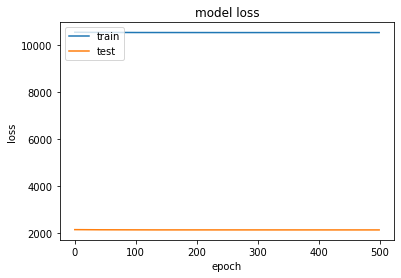